In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier # أو أي نموذج تصنيف آخر
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os

In [ ]:
df = pd.read_csv('/content/Fulldata. 2csv.csv')

df.info()
df.head()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            1903 non-null   float64
 1   Student_Fname         1903 non-null   object 
 2   Student_Lname         1903 non-null   object 
 3   Student_Address       1903 non-null   object 
 4   Student_Name          1903 non-null   object 
 5   Gender                1903 non-null   object 
 6   Faculty               1903 non-null   object 
 7   Certification_Field   1903 non-null   object 
 8   Certification_Soutce  1903 non-null   object 
 9   Company_Name          1903 non-null   object 
 10  Company_location      1903 non-null   object 
 11  Company_Type          1903 non-null   object 
 12  Company_Filed         1903 non-null   object 
 13  Jop_Website           1903 non-null   object 
 14  Jop_Category          1903 non-null   object 
 15  Jop_Title            

,0
Student_ID,0
Student_Fname,0
Student_Lname,0
Student_Address,0
Student_Name,0
Gender,0
Faculty,0
Certification_Field,0
Certification_Soutce,0
Company_Name,0


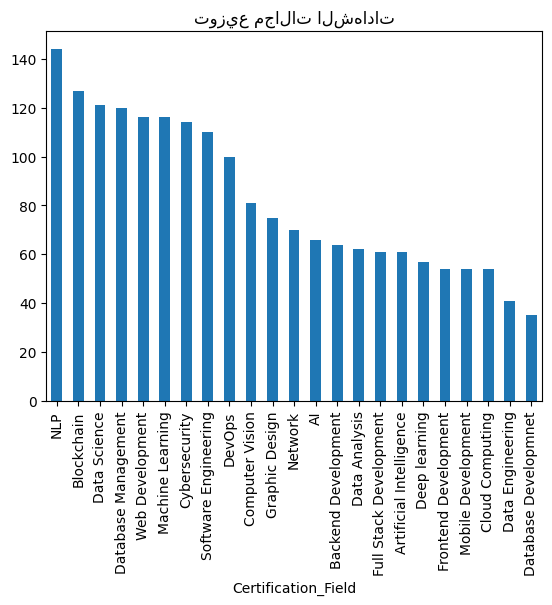

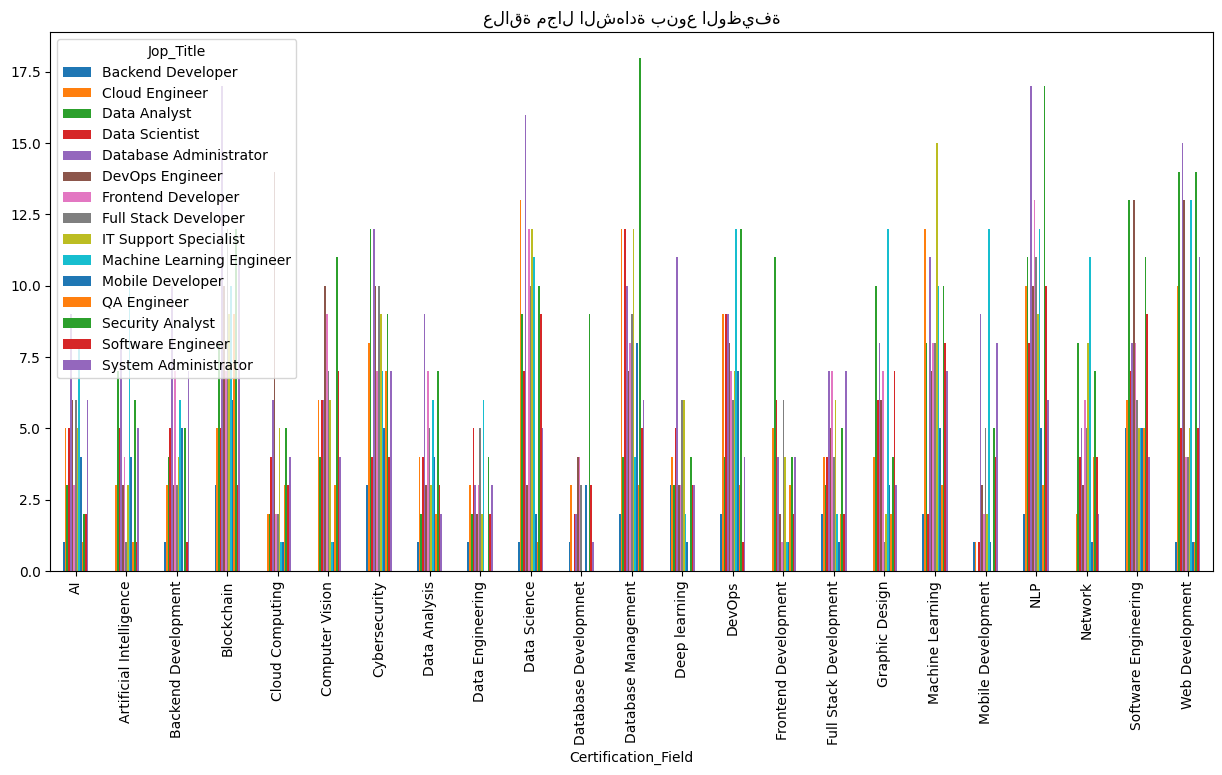

In [ ]:
data['Certification_Field'].value_counts().plot(kind='bar')
plt.title('توزيع مجالات الشهادات')
plt.show()

# تحليل العلاقة بين مجال الشهادة ونوع الوظيفة
pd.crosstab(data['Certification_Field'], data['Jop_Title']).plot(kind='bar', figsize=(15, 7))
plt.title('علاقة مجال الشهادة بنوع الوظيفة')
plt.show()

In [ ]:
df = df.dropna(subset=['Jop_Title'])
columns_to_drop = [
    'Student_ID', 'Student_Fname', 'Student_Lname', 'Student_Address', 'Student_Name',
    'Jop_Website', 'Jop_Statue',
    'Course_ID', 'Intake_ID', 'Course_Name', 'Track_Branch', 'Dept_Name',
    'Track_Name'
]
df = df.drop(columns_to_drop, axis=1, errors='ignore')


In [ ]:
for col in ['Certification_Field', 'Certification_Soutce', 'Faculty',
            'Company_Type', 'Company_location']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True) # Fill missing categorical with 'Unknown'

df.isnull().sum()


,0
Gender,0
Faculty,0
Certification_Field,0
Certification_Soutce,0
Company_Name,0
Company_location,0
Company_Type,0
Company_Filed,0
Jop_Category,0
Jop_Title,0


In [ ]:
features = ['Certification_Field', 'Certification_Soutce', 'Faculty',
            'Company_Type', 'Company_location', 'Jop_Category']
target = 'Jop_Title'

le_dict = {}
for col in features + [target]:
    if col in df.columns and df[col].dtype == 'object':
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        le_dict[col] = le

X_encoded_cols = [f'{col}_encoded' for col in features if f'{col}_encoded' in df.columns]
X = df[X_encoded_cols]
y = df[f'{target}_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
le_dict = {}
for col in features + [target]:
    if col in df.columns and df[col].dtype == 'object': # Only encode object/string columns
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        le_dict[col] = le # Store the encoder
X_encoded_cols = [f'{col}_encoded' for col in features if f'{col}_encoded' in df.columns]
X = df[X_encoded_cols]
y = df[f'{target}_encoded'] # Target will also be encoded

print(df[[col for col in X_encoded_cols] + [f'{target}_encoded']].head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")
target_class_names = le_dict[target].classes_
print(classification_report(y_test, y_pred, target_names=target_class_names))

# Save the trained model and LabelEncoders
model_dir = 'model_for_deployment_new_target' # New directory for this model
os.makedirs(model_dir, exist_ok=True)

joblib.dump(best_model, os.path.join(model_dir, 'best_model_job_title.pkl'))

# Save all LabelEncoders used
for col, encoder in le_dict.items():
    joblib.dump(encoder, os.path.join(model_dir, f'le_{col}.pkl'))

   Certification_Field_encoded  Certification_Soutce_encoded  Faculty_encoded  \
0                            2                             3                1   
1                            2                             3                4   
2                           10                             2                6   
3                           16                             3                5   
4                           16                             3                6   

   Company_Type_encoded  Company_location_encoded  Jop_Category_encoded  \
0                     1                         8                     1   
1                     1                         1                     5   
2                     1                         4                     9   
3                     1                         1                     2   
4                     1                         1                     1   

   Jop_Title_encoded  
0                  3  
1               

In [ ]:

# Create a sample new data point with the new features
new_data_sample = pd.DataFrame({
    'Certification_Field': ['Database'],
    'Certification_Soutce': ['Coursera'],
    'Faculty': ['Art'],
    'Company_Type': ['Local'],
    'Company_location': ['Cairo'],
    'Jop_Category': ['Web Development']
})

# Load the saved encoders and model from the new directory
loaded_model = joblib.load(os.path.join(model_dir, 'best_model_job_title.pkl'))
loaded_le_dict = {}
for col in features + [target]:
    if os.path.exists(os.path.join(model_dir, f'le_{col}.pkl')):
        loaded_le_dict[col] = joblib.load(os.path.join(model_dir, f'le_{col}.pkl'))
    else:
        print(f"Warning: Encoder for {col} not found. Ensure all encoders are saved correctly.")

In [ ]:

# Transform new data using the loaded encoders
encoded_new_data = pd.DataFrame()
for col in features:
    if col in new_data_sample.columns and col in loaded_le_dict:
        try:
            encoded_new_data[f'{col}_encoded'] = loaded_le_dict[col].transform(new_data_sample[col])
        except ValueError as e:
            print(f"Error encoding {col}: {e}. This likely means a new category was encountered.")
            # Handle unknown categories - e.g., use a default value, or skip this prediction
            encoded_new_data[f'{col}_encoded'] = -1 # Or some other indicator for unknown
    else:
        # If a feature is missing from new_data_sample or its encoder is missing
        # you need to decide how to handle it. For now, assume it's critical.
        print(f"Missing feature '{col}' in new data or its encoder.")
        exit() # Or handle more gracefully

# Ensure the order of columns matches the training data
X_new_for_prediction = encoded_new_data[X_encoded_cols]

# Make predictions
predictions_encoded = loaded_model.predict(X_new_for_prediction)

# Inverse transform the prediction to get the original job title name
predicted_job_title = loaded_le_dict[target].inverse_transform(predictions_encoded)

new_data_sample['Predicted_Jop_Title'] = predicted_job_title
print("\nNew Predictions:")
print(new_data_sample[['Faculty', 'Certification_Field', 'Jop_Category', 'Predicted_Jop_Title']])

Error encoding Certification_Field: y contains previously unseen labels: 'Database'. This likely means a new category was encountered.
Error encoding Faculty: y contains previously unseen labels: 'Art'. This likely means a new category was encountered.
Error encoding Company_location: y contains previously unseen labels: 'Cairo'. This likely means a new category was encountered.

New Predictions:
  Faculty Certification_Field     Jop_Category Predicted_Jop_Title
0     Art            Database  Web Development      Cloud Engineer


In [ ]:
import joblib

# حفظ الموديل
joblib.dump(model, 'model.pkl')

['model.pkl']